In [1]:
import pandas as pd

# Load the dataset
df = pd.read_csv("/content/adult 3 (1).csv")

# Define a function that assigns salary range based on features
def get_salary_band(row):
    hours = row['hours-per-week']
    edu = row['education']
    occ = row['occupation']
    age = row['age']
    gain = row['capital-gain']
    loss = row['capital-loss']

    if hours < 25 or edu in ['10th', '11th', '7th-8th']:
        return '0-10k'
    elif hours < 35 and edu in ['HS-grad', 'Some-college']:
        return '10-20k'
    elif hours >= 35 and edu in ['HS-grad', 'Assoc-acdm', 'Assoc-voc']:
        return '20-30k'
    elif hours >= 40 and edu in ['Bachelors'] and occ in ['Tech-support', 'Craft-repair', 'Sales']:
        return '30-40k'
    elif edu in ['Masters', 'Prof-school', 'Doctorate'] or occ in ['Exec-managerial', 'Prof-specialty']:
        return '40-50k'
    else:
        return '50k+'

# Apply the function to the DataFrame
df['Salary_Range'] = df.apply(get_salary_band, axis=1)

# Drop old income column
df.drop('income', axis=1, inplace=True)

# Save the new dataset
df.to_csv("employee_salary_logic_based.csv", index=False)

# Preview
print(df[['age', 'education', 'occupation', 'hours-per-week', 'Salary_Range']].head(10))

   age     education         occupation  hours-per-week Salary_Range
0   25          11th  Machine-op-inspct              40        0-10k
1   38       HS-grad    Farming-fishing              50       20-30k
2   28    Assoc-acdm    Protective-serv              40       20-30k
3   44  Some-college  Machine-op-inspct              40         50k+
4   18  Some-college                  ?              30       10-20k
5   34          10th      Other-service              30        0-10k
6   29       HS-grad                  ?              40       20-30k
7   63   Prof-school     Prof-specialty              32       40-50k
8   24  Some-college      Other-service              40         50k+
9   55       7th-8th       Craft-repair              10        0-10k


In [2]:
# Load the dataset
data = pd.read_csv("employee_salary_logic_based.csv")
data.shape

(48842, 15)

In [3]:
#label encoding
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()

import matplotlib.pyplot as plt

In [4]:
#replace ? with others
data.replace('?', 'Others', inplace=True)
data.to_csv("/content/employee_salary_logic_based.csv", index=False)

In [5]:
print(data['workclass'].value_counts())

workclass
Private             33906
Self-emp-not-inc     3862
Local-gov            3136
Others               2799
State-gov            1981
Self-emp-inc         1695
Federal-gov          1432
Without-pay            21
Never-worked           10
Name: count, dtype: int64


In [6]:
data=data[data['workclass']!='Without-pay']
data=data[data['workclass']!='Never-worked']
print(data['workclass'].value_counts())

workclass
Private             33906
Self-emp-not-inc     3862
Local-gov            3136
Others               2799
State-gov            1981
Self-emp-inc         1695
Federal-gov          1432
Name: count, dtype: int64


In [7]:
data=data[data['educational-num']!=1]
print(data['educational-num'].value_counts())

educational-num
9     15768
10    10873
13     8025
14     2657
11     2061
7      1809
12     1599
6      1387
4       952
15      834
5       756
8       657
16      594
3       509
2       247
Name: count, dtype: int64


In [8]:
data=data[data['marital-status']!='Married-spouse-absent']
print(data['marital-status'].value_counts())

marital-status
Married-civ-spouse    22335
Never-married         16066
Divorced               6630
Separated              1527
Widowed                1512
Married-AF-spouse        37
Name: count, dtype: int64


In [9]:
data=data[data['occupation']!='Priv-house-serv']
print(data['occupation'].value_counts())

occupation
Prof-specialty       6107
Exec-managerial      6032
Craft-repair         6028
Adm-clerical         5522
Sales                5446
Other-service        4808
Machine-op-inspct    2972
Others               2746
Transport-moving     2322
Handlers-cleaners    2034
Tech-support         1437
Farming-fishing      1431
Protective-serv       976
Armed-Forces           15
Name: count, dtype: int64


In [10]:
data=data[data['education']!='5th-6th']
data=data[data['education']!='1st-4th']
data=data[data['education']!='Preschool']

In [11]:
data.shape

(47194, 15)

In [12]:
#redundancy

data.drop(columns=['education'],inplace=True)

In [13]:
from sklearn.preprocessing import LabelEncoder
import pickle

# Create a dictionary to hold encoders for each column
encoders = {}

# List of categorical columns to encode
categorical_cols = ['workclass', 'marital-status', 'occupation', 'relationship', 'race', 'gender', 'native-country']

# Encode each column with a separate LabelEncoder and store the encoder
for col in categorical_cols:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])
    encoders[col] = le

# Save encoders to a file for later decoding in Streamlit UI
with open("label_encoders.pkl", "wb") as f:
    pickle.dump(encoders, f)


In [14]:
data['workclass']=encoder.fit_transform(data['workclass'])
data['marital-status']=encoder.fit_transform(data['marital-status'])
data['occupation']=encoder.fit_transform(data['occupation'])
data['relationship']=encoder.fit_transform(data['relationship'])
data['race']=encoder.fit_transform(data['race'])
data['gender']=encoder.fit_transform(data['gender'])
data['native-country']=encoder.fit_transform(data['native-country'])

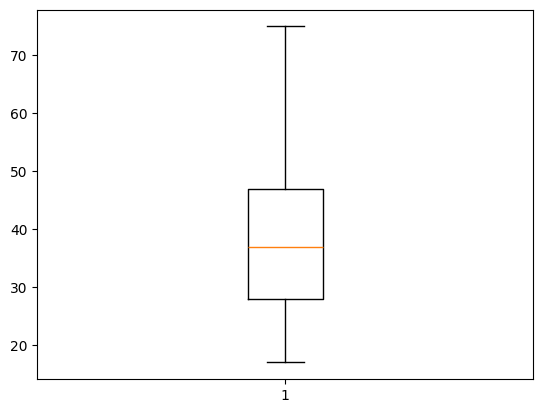

In [17]:
plt.boxplot(data['age'])
plt.show()

In [16]:
data=data[(data['age']<=75) & (data['age']>=17)]

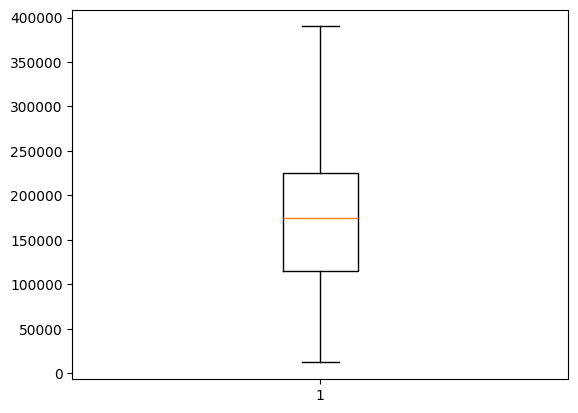

In [20]:
plt.boxplot(data['fnlwgt'])
plt.show()

In [19]:
data = data[(data['fnlwgt'] <= 390000)]

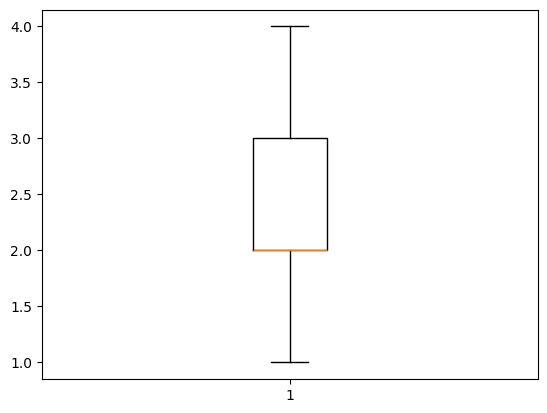

In [23]:
plt.boxplot(data['marital-status'])
plt.show()

In [22]:
data=data[(data['marital-status']<=4) & (data['marital-status']>=1)]

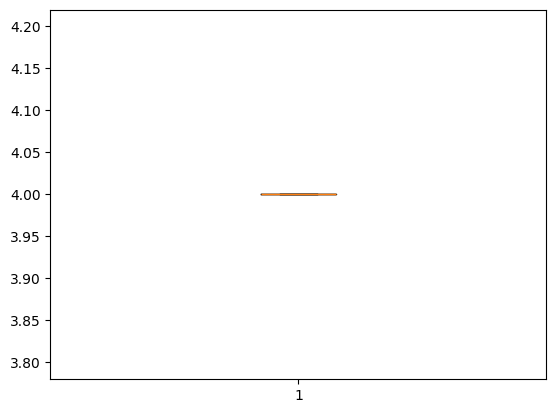

In [26]:
plt.boxplot(data['race'])
plt.show()

In [25]:
data=data[(data['race']==4)]

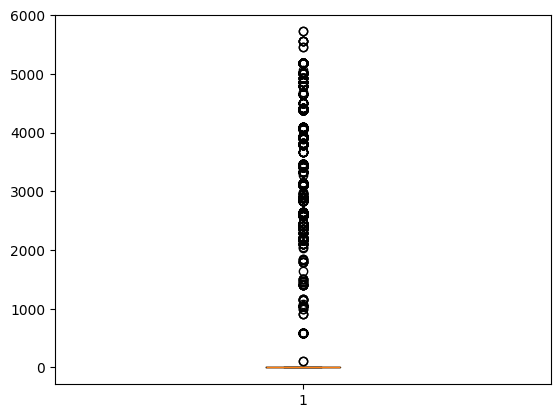

In [30]:
plt.boxplot(data['capital-gain'])
plt.show()

In [29]:
data=data[(data['capital-gain']<=6000)]

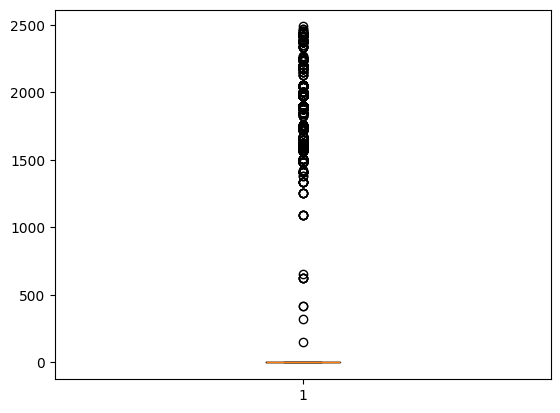

In [33]:
plt.boxplot(data['capital-loss'])
plt.show()

In [32]:
data=data[(data['capital-loss']<=2500)]

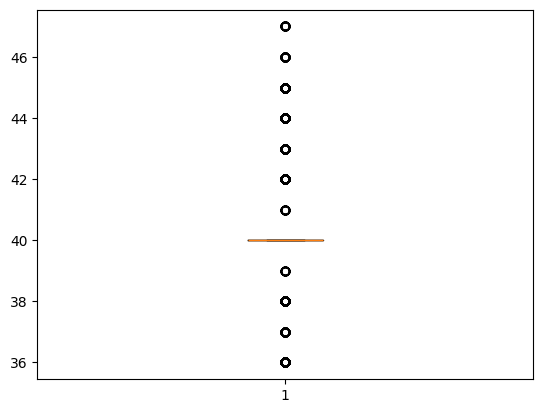

In [36]:
plt.boxplot(data['hours-per-week'])
plt.show()

In [35]:
data=data[(data['hours-per-week']<=47) & (data['hours-per-week']>=36)]

In [37]:
#done removing outliers

In [38]:
data.shape

(17041, 14)

In [39]:
x=data.drop(columns=['Salary_Range'])
y=data['Salary_Range']

In [40]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=42,stratify=y)
#0.2 is 20 perc of testing data, stratify : data eql split

In [41]:
# Machine learning algorithm: Random Forest
from sklearn.ensemble import RandomForestClassifier

# Initialize the model
rf = RandomForestClassifier(random_state=42)

# Fit the model with training data
rf.fit(xtrain, ytrain)

# Predict using the test data
predict = rf.predict(xtest)

# Show predictions
predict

array(['40-50k', '40-50k', '50k+', ..., '20-30k', '50k+', '20-30k'],
      dtype=object)

In [42]:
# Import the joblib module
import joblib

# Save the trained model
joblib.dump(rf, 'salary_model.pkl')  # 'rf' is your trained Random Forest model

# Save the feature columns used for prediction
feature_columns = x.columns.tolist()
joblib.dump(feature_columns, 'feature_columns.pkl')


['feature_columns.pkl']

In [43]:
from sklearn.metrics import accuracy_score
accuracy_score(ytest,predict) #compare predicted value with accurate value


0.9891463772367263

In [44]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(ytest, predict))
print("Confusion Matrix:\n", confusion_matrix(ytest, predict))


              precision    recall  f1-score   support

       0-10k       0.96      1.00      0.98       258
      20-30k       1.00      1.00      1.00      1501
      30-40k       0.98      1.00      0.99       146
      40-50k       0.98      0.98      0.98       688
        50k+       0.99      0.97      0.98       816

    accuracy                           0.99      3409
   macro avg       0.98      0.99      0.99      3409
weighted avg       0.99      0.99      0.99      3409

Confusion Matrix:
 [[ 258    0    0    0    0]
 [   0 1501    0    0    0]
 [   0    0  146    0    0]
 [   3    0    0  674   11]
 [   9    0    3   11  793]]


In [45]:
%pip install -q streamlit pyngrok

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 3.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.9/9.9 MB 105.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 95.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 7.0 MB/s eta 0:00:00


In [46]:
!ngrok authtoken 302FQDAF82XAaLKKOctewGgWRNn_4DbLYaPBbLSkyabLg4RY

Authtoken saved to configuration file: /root/.config/ngrok/ngrok.yml


In [47]:
%%writefile app.py
import streamlit as st
import pandas as pd
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
# Removed LabelEncoder as we will do manual encoding
# from sklearn.preprocessing import LabelEncoder
import sys # Import sys for error logging
import os # Import os for path checking
import numpy as np

# Load model and feature columns
@st.cache_resource
def load_model_and_features():
    model = None
    feature_columns = None
    model_loaded = False
    try:
        # Check if files exist before attempting to load
        if not os.path.exists("salary_model.pkl"):
            st.error("Model file (salary_model.pkl) not found. Please train the model first.")
            return None, None, False
        if not os.path.exists("feature_columns.pkl"):
             st.error("Feature columns file (feature_columns.pkl) not found. Please train the model first.")
             return None, None, False

        # Load model and feature columns using joblib as they were saved with joblib
        import joblib
        model = joblib.load("salary_model.pkl")
        feature_columns = joblib.load("feature_columns.pkl")

        # Ensure feature_columns is a list of strings
        if not isinstance(feature_columns, list) or not all(isinstance(col, str) for col in feature_columns):
            st.error("Feature columns loaded but not in the expected format (list of strings).")
            return None, None, False

        model_loaded = True
    except FileNotFoundError:
        st.error("Model or feature_columns not found. Please train the model first.")
        model_loaded = False
    except Exception as e:
        st.error(f"Error loading model or feature columns: {e}")
        model_loaded = False
    return model, feature_columns, model_loaded

model, feature_columns, model_loaded = load_model_and_features()

# Load and clean training data for analysis (only when needed)
@st.cache_data
def load_and_clean_training_data():
    training_data = None
    try:
        # Check if training data file exists before loading
        if not os.path.exists("employee_salary_logic_based.csv"):
            st.error("Training data file (employee_salary_logic_based.csv) not found for analysis.")
            return None

        training_data = pd.read_csv("employee_salary_logic_based.csv")
        # Add a check for 'Salary_Range' column immediately after loading
        if 'Salary_Range' not in training_data.columns:
             st.error("Error: 'Salary_Range' column not found in training data file for analysis.")
             return None # Return None if the crucial column is missing
        else:
            # Replicate the exact cleaning steps from the original notebook
            # Check before replace
            for col in training_data.columns:
                 # Check if column exists and is of object type before replace
                 if col in training_data.columns and training_data[col].dtype == 'object':
                     training_data[col].replace('?', 'Others', inplace=True)


            # Reviewing cleaning steps to ensure '10k-20k' is not filtered out
            if 'workclass' in training_data.columns:
                # Check for 'workclass' before each filter using it
                training_data = training_data[training_data['workclass']!='Without-pay']
                training_data = training_data[training_data['workclass']!='Never-worked']
            else:
                 st.warning("'workclass' column not found in training data. Skipping filters for workclass.")


            # Check for 'educational-num' before filtering
            if 'educational-num' in training_data.columns:
                # Ensure column is numeric before filtering
                if pd.api.types.is_numeric_dtype(training_data['educational-num']):
                    training_data=training_data[training_data['educational-num']!=1]
                else:
                    st.warning("'educational-num' column is not numeric. Skipping filter for educational-num == 1.")
            else:
                st.warning("'educational-num' column not found in training data. Skipping filter for educational-num == 1.")

            # Filter based on original 'marital-status' values before encoding
            if 'marital-status' in training_data.columns:
                 # Check for 'marital-status' before the filter
                 training_data = training_data[~training_data['marital-status'].isin(['Married-spouse-absent', 'Ma'])]
            else:
                 st.warning("'marital-status' column not found in training data. Skipping filter for marital-status.")

            if 'occupation' in training_data.columns:
                 # Check for 'occupation' before the filter
                 training_data = training_data[~training_data['occupation'].isin(['Priv-house-serv', 'Armed-Forces'])] # Corrected filtering for occupation and Armed-Forces
            else:
                st.warning("'occupation' column not found in training data. Skipping filter for occupation.")


            # Filter based on original 'education' values before dropping
            if 'education' in training_data.columns:
                training_data=training_data[~training_data['education'].isin(['5th-6th', '1st-4th', 'Preschool'])]
                 # Drop the 'education' column AFTER filtering
                training_data.drop(columns=['education'],inplace=True)
            else:
                 st.warning("'education' column not found in training data. Skipping filter and drop for education.")

            # Note: The 'educational-num' column is kept and used.

            # Apply numerical filters based on the ranges determined during training
            # These filters seem to be the most likely cause of missing salary ranges
            if 'age' in training_data.columns:
                # Ensure column is numeric before filtering
                if pd.api.types.is_numeric_dtype(training_data['age']):
                    training_data=training_data[(training_data['age']<=75) & (training_data['age']>=17)]
                else:
                     st.warning("'age' column is not numeric. Skipping filter for age.")
            else:
                st.warning("'age' column not found in training data. Skipping filter for age.")

            if 'fnlwgt' in training_data.columns:
                 # Ensure column is numeric before filtering
                 if pd.api.types.is_numeric_dtype(training_data['fnlwgt']):
                    training_data = training_data[(training_data['fnlwgt'] <= 390000)]
                 else:
                    st.warning("'fnlwgt' column is not numeric. Skipping filter for fnlwgt.")
            else:
                st.warning("'fnlwgt' column not found in training data. Skipping filter for fnlwgt.")


            # Removed the filter based on numeric value 4 for 'race' column
            # if 'race' in training_data.columns:
            #      # Ensure column is numeric before filtering
            #      if pd.api.types.is_numeric_dtype(training_data['race']):
            #         training_data = training_data[(training_data['race']==4)] # This filter seems specific, might need review
            #      else:
            #         st.warning("'race' column is not numeric. Skipping filter for race == 4.")
            # else:
            #     st.warning("'race' column not found in training data. Skipping filter for race == 4.")


            if 'capital-gain' in training_data.columns:
                # Ensure column is numeric before filtering
                if pd.api.types.is_numeric_dtype(training_data['capital-gain']):
                    training_data=training_data[(training_data['capital-gain']<=6000)]
                else:
                    st.warning("'capital-gain' column is not numeric. Skipping filter for capital-gain.")
            else:
                 st.warning("'capital-gain' column not found in training data. Skipping filter for capital-gain.")

            if 'capital-loss' in training_data.columns:
                 # Ensure column is numeric before filtering
                 if pd.api.types.is_numeric_dtype(training_data['capital-loss']):
                    training_data=training_data[(training_data['capital-loss']<=2500)]
                 else:
                    st.warning("'capital-loss' column is not numeric. Skipping filter for capital-loss.")

            else:
                 st.warning("'capital-loss' column not found in training data. Skipping filter for capital-loss.")

            # Removed this filter to potentially include data points from lower hour ranges for plotting
            # if 'hours-per-week' in training_data.columns:
            #      # Ensure column is numeric before filtering
            #      if pd.api.types.is_numeric_dtype(training_data['hours-per-week']):
            #         training_data=training_data[(training_data['hours-per-week']<=47) & (training_data['hours-per-week']>=36)]
            #      else:
            #         st.warning("'hours-per-week' column is not numeric. Skipping filter for hours-per-week.")
            # else:
            #      st.warning("'hours-per-week' column not found in training data. Skipping filter for hours-per-week.")


    except FileNotFoundError:
        # This block is technically redundant due to os.path.exists checks, but kept for clarity
        st.error("Training data file (employee_salary_logic_based.csv) not found for analysis.")
        return None
    except Exception as e:
        st.error(f"Error loading or processing training data for analysis: {e}")
        return None

    return training_data


# Define expected categorical columns and their full categories based on original data
# These lists should be comprehensive of all possible values including 'Others' if handled.
CATEGORICAL_FEATURES = {
    'workclass': ['Federal-gov', 'Local-gov', 'Private', 'Self-emp-inc', 'Self-emp-not-inc', 'State-gov', 'Others'], # Removed Without-pay and Never-worked as per notebook cleaning
    'marital-status': ['Divorced', 'Married-AF-spouse', 'Married-civ-spouse', 'Never-married', 'Separated', 'Widowed'], # Removed Married-spouse-absent and 'Ma' as per notebook cleaning
    'occupation': ['Adm-clerical', 'Craft-repair', 'Exec-managerial', 'Farming-fishing',
                   'Handlers-cleaners', 'Machine-op-inspct', 'Other-service', 'Prof-specialty',
                   'Protective-serv', 'Sales', 'Tech-support', 'Transport-moving', 'Others'], # Removed Priv-house-serv and Armed-Forces as per notebook cleaning
    'relationship': ['Husband', 'Not-in-family', 'Other-relative', 'Own-child', 'Unmarried', 'Wife'],
    'race': ['Amer-Indian-Eskimo', 'Asian-Pac-Islander', 'Black', 'Other', 'White'], # Keeping all races here for consistency, though notebook filtered to White
    'gender': ['Female', 'Male'],
    'native-country': ['Cambodia', 'Canada', 'China', 'Columbia', 'Cuba', 'Dominican-Republic', 'Ecuador', 'El-Salvador', 'England', 'France', 'Germany', 'Greece', 'Guatemala', 'Haiti', 'Honduras', 'Hong', 'Hungary', 'India', 'Iran', 'Ireland', 'Italy', 'Jamaica', 'Japan', 'Laos', 'Mexico', 'Nicaragua', 'Outlying-US(Guam-USVI-Puerto Rico)', 'Peru', 'Philippines', 'Poland', 'Portugal', 'Puerto-Rico', 'Scotland', 'South', 'Taiwan', 'Thailand', 'Trinadad&Tobago', 'United-States', 'Vietnam', 'Yugoslavia', 'Others'] # Keeping all countries here for consistency
}


# Manual Categorical Encoding
def encode_input(df, feature_columns):
    if df is None or feature_columns is None:
        st.error("Input DataFrame or feature columns are None. Cannot encode input.")
        return None

    encoded_df = pd.DataFrame(index=df.index) # Create an empty DataFrame to build the encoded data

    # Iterate through the columns the model expects
    for col in feature_columns:
        try:
            # Check if the column exists in the input DataFrame
            if col in df.columns:
                if col in CATEGORICAL_FEATURES: # Expected categorical column
                    unseen_value = str(df[col].iloc[0]) # Get the scalar string value

                    # Manual lookup of the index
                    try:
                        encoded_value = CATEGORICAL_FEATURES[col].index(unseen_value)
                    except ValueError:
                         st.warning(f"Unseen value '{unseen_value}' in column '{col}'. Mapping to default category (first class).")
                         encoded_value = 0 # Default to the index of the first category

                    encoded_df[col] = encoded_df[col] = encoded_value # Corrected assignment here

                else: # Numerical column (or other non-categorical expected column)
                     # Ensure the column is numeric before assigning
                     if pd.api.types.is_numeric_dtype(df[col]):
                         encoded_df[col] = df[col]
                     else:
                         st.warning(f"Input column '{col}' is not numeric as expected. Assigning default value (0).")
                         encoded_df[col] = 0 # Assign a default value if not numeric

            else:
                # If the column is in feature_columns but not in input_df,
                # add it to encoded_df with a default value (e.g., 0) to avoid errors later.
                # This assumes 0 is a safe default or will be handled by the model.
                st.warning(f"Feature column '{col}' not found in input data. Adding with default value (0).")
                encoded_df[col] = 0 # Assign a default value

        except Exception as e:
            st.error(f"Error processing column '{col}' during encoding: {e}")
            # Log the full traceback for detailed debugging
            import traceback
            st.error(traceback.format_exc())
            return None # Indicate failure

    # Ensure the final DataFrame has columns in the exact order expected by the model
    # Reindex to make sure all columns are present and in the correct order
    # This step is crucial even with the loop above, as it guarantees the order.
    # Fill any potentially missing columns after processing with 0
    encoded_df = encoded_df.reindex(columns=feature_columns, fill_value=0)


    return encoded_df[feature_columns]


# Suggestion generator
def generate_suggestions(user_input):
    suggestions = []
    # Access user input from the DataFrame row
    user_row = user_input.iloc[0]

    # Check educational-num based on the numerical value
    if 'educational-num' in user_row and user_row['educational-num'] < 13:
        suggestions.append("📘 Consider pursuing higher education to qualify for better-paying roles.")
    if 'hours-per-week' in user_row and user_row['hours-per-week'] < 40:
        suggestions.append("⏱️ Increase your weekly working hours to improve visibility and earnings.")
    if 'capital-gain' in user_row and user_row['capital-gain'] == 0:
        suggestions.append("📈 Explore investment or side income opportunities to boost financial standing.")
    # Check occupation based on the string value
    if 'occupation' in user_row and user_row['occupation'] in ['Priv-house-serv', 'Other-service']:
        suggestions.append("💼 Consider shifting to professional/technical domains for better salaries.")
    if 'age' in user_row and user_row['age'] < 25:
        suggestions.append("⏳ With more experience and time, your earning potential is likely to increase.")


    return suggestions


# Set up UI
st.set_page_config(page_title="Employee Salary Prediction", layout="wide")


st.title("💼 Employee Salary Prediction System")
st.markdown("Enter employee details below to predict their salary range.")

# Create sidebars
st.sidebar.header("User Input Features")
st.sidebar.markdown("Adjust the values below to predict salary.")


# Smart Input Form in the left sidebar
def user_input_features(feature_columns):
    # Ensure these features and their order match the feature_columns from training
    # Check if feature_columns is loaded before creating widgets
    if feature_columns is None:
        st.error("Feature columns not loaded. Cannot display input form.")
        return None

    # Define input widgets based on expected features
    input_data_dict = {}

    for col in feature_columns:
        try:
            if col == 'age':
                input_data_dict[col] = st.sidebar.slider("Age", 17, 75, 30)
            elif col in CATEGORICAL_FEATURES:
                options = CATEGORICAL_FEATURES[col]
                # Ensure selected value is a string
                input_data_dict[col] = str(st.sidebar.selectbox(col.replace('-', ' ').title(), options))
            elif col == 'fnlwgt':
                 input_data_dict[col] = st.sidebar.number_input("Final Weight (fnlwgt)", min_value=10000, max_value=390000, value=50000)
            elif col == 'educational-num':
                input_data_dict[col] = st.sidebar.slider("Education Level (numeric)", 2, 16, 10)
            elif col == 'capital-gain':
                input_data_dict[col] = st.sidebar.number_input("Capital Gain", min_value=0, max_value=6000, value=0)
            elif col == 'capital-loss':
                input_data_dict[col] = st.sidebar.number_input("Capital Loss", min_value=0, max_value=2500, value=0)
            elif col == 'hours-per-week':
                # Increased the upper bound to match the logic in the original notebook's salary banding function
                input_data_dict[col] = st.sidebar.slider("Hours per Week", 1, 99, 40)
            # Add more elif blocks for other numerical features if needed
        except Exception as e:
            st.error(f"Error creating input widget for column '{col}': {e}")
            # Log the full traceback for detailed debugging
            import traceback
            st.error(traceback.format_exc())
            return None # Indicate failure if widget creation fails


    # Create DataFrame with the correct column names and order
    if input_data_dict:
        input_data = pd.DataFrame([input_data_dict])
        # Ensure the DataFrame has all feature_columns, even if some widgets were skipped (fill with default 0)
        input_data = input_data.reindex(columns=feature_columns, fill_value=0)
        return input_data
    else:
        return None


# Get user input
input_df = user_input_features(feature_columns)

# Predict Button
if model_loaded and input_df is not None and st.button("🔮 Predict Salary Range"):
    encoded_df = encode_input(input_df.copy(), feature_columns)

    # Check if encoding was successful and columns match before predicting
    if encoded_df is not None and list(encoded_df.columns) == feature_columns:
        # Make prediction using the loaded model and encoded input
        try:
            prediction = model.predict(encoded_df)[0]
            st.success(f"✅ Predicted Salary Range: **{prediction}**")

            # Display Suggestions on the main screen (Moved before Data Analysis)
            st.subheader("📌Personalized Suggestions to Improve Salary:")
            suggestions = generate_suggestions(input_df) # Pass the input_df DataFrame
            if suggestions:
                for s in suggestions:
                    st.markdown(f"- {s}")
            else:
                st.info("Based on your input, you are in a good position. Keep up the great work!")


            # Load and display Data Analysis section (Moved after Suggestions)
            training_data = load_and_clean_training_data() # Load and clean data here

            if training_data is not None:
                st.header("📊 Where You Stand Compared to Others")
                # Calculate salary range percentages
                if 'Salary_Range' in training_data.columns:
                     if not training_data['Salary_Range'].empty:
                        salary_counts = training_data['Salary_Range'].value_counts().sort_index()
                        total_count = salary_counts.sum()
                        salary_percentages = (salary_counts / total_count) * 100

                        st.markdown("This graph shows the distribution of salary ranges and highlights your predicted range.")

                        # Combined Salary Range Distribution Graph (Salary Range Counts)
                        fig_salary, ax_salary = plt.subplots(figsize=(10, 6)) # Increased figure size
                        bars = ax_salary.bar(salary_percentages.index, salary_percentages.values, color='lightgray')

                        # Create a list of salary ranges in the desired order for percentage calculation and plotting
                        salary_order = ['0-10k', '10-20k', '20-30k', '30-40k', '40-50k', '50k+']

                        # Highlight the predicted salary range bar in RED
                        try:
                            # Use the defined salary_order for finding the index
                            predicted_index = salary_order.index(prediction)
                            # Ensure the salary range exists in the current plot data before attempting to color
                            if prediction in salary_percentages.index:
                                bar_index_in_plot = salary_percentages.index.get_loc(prediction)
                                bars[bar_index_in_plot].set_color('red')
                                bars[bar_index_in_plot].set_label('Your Predicted Range')
                                ax_salary.legend()
                            else:
                                st.warning(f"Predicted salary range '{prediction}' not found in the current training data distribution for highlighting.")


                            # Add percentage text on top of bars
                            for bar in bars:
                                yval = bar.get_height()
                                plt.text(bar.get_x() + bar.get_width()/2.0, yval, f'{yval:.1f}%', va='bottom', ha='center', fontsize=9) # Adjusted text position

                        except ValueError:
                             st.warning(f"Predicted salary range '{prediction}' not in the defined salary order list. Cannot highlight or calculate relative standing accurately.")
                             # Add percentage text on top of all bars even if predicted range not in order
                             for bar in bars:
                                yval = bar.get_height()
                                plt.text(bar.get_x() + bar.get_width()/2.0, yval, f'{yval:.1f}%', va='bottom', ha='center', fontsize=9)


                        ax_salary.set_xlabel("Salary Range")
                        ax_salary.set_ylabel("Percentage of People") # Changed label to Percentage
                        ax_salary.set_title("Distribution of Salary Ranges (%)") # Updated title
                        plt.tight_layout()
                        st.pyplot(fig_salary)
                        plt.close(fig_salary)

                        # Display "LeetCode style" percentage information
                        st.subheader("Your Standing:")
                        try:
                            # Ensure prediction is in the salary_order list before calculating index
                            if prediction in salary_order:
                                predicted_percentage = salary_percentages.get(prediction, 0) # Use .get to handle cases where predicted range might not be in filtered data
                                st.write(f"Your predicted salary range ('{prediction}') includes approximately **{predicted_percentage:.1f}%** of the people globally.")

                                # Calculate and display percentage of people with higher salaries
                                # Use salary_order for consistent comparison
                                higher_salary_ranges = [sr for sr in salary_order if salary_order.index(sr) > salary_order.index(prediction)]
                                if higher_salary_ranges:
                                    # Sum percentages for ranges in higher_salary_ranges, handle potential missing keys
                                    cumulative_higher_percentage = salary_percentages[salary_percentages.index.isin(higher_salary_ranges)].sum()

                                    # Calculate percentage of people with lower or equal salaries
                                    lower_or_equal_salary_ranges = [sr for sr in salary_order if salary_order.index(sr) <= salary_order.index(prediction)]
                                    cumulative_lower_or_equal_percentage = salary_percentages[salary_percentages.index.isin(lower_or_equal_salary_ranges)].sum()


                                    st.write(f"You are in a higher salary range than approximately **{(cumulative_lower_or_equal_percentage - predicted_percentage):.1f}%** of the people.")
                                    st.write(f"Approximately **{cumulative_higher_percentage:.1f}%** of the people have a higher salary range than yours.")
                                else:
                                    st.write("Your predicted salary range is the highest among the defined ranges.")
                            else:
                                st.warning(f"Predicted salary range '{prediction}' not in the defined salary order list. Cannot calculate relative standing accurately.")


                        except KeyError:
                            st.warning(f"Predicted salary range '{prediction}' not found in calculated percentages for detailed standing analysis.")
                        except ValueError:
                            st.warning("Could not determine the position of your predicted salary range in the ordered list for detailed standing analysis.")


                     else:
                        st.warning("'Salary_Range' column in training data is empty. Skipping plotting salary distribution and percentage analysis.")

                else:
                    st.warning("'Salary_Range' column not found in training data for plotting and percentage analysis.")


                # Add Age and Hours per Week by Salary Range Grouped Bar Chart
                if all(col in training_data.columns for col in ['age', 'hours-per-week', 'Salary_Range']):
                    st.subheader("Average Age and Hours per Week by Salary Range")
                    try:
                        # Ensure columns are numeric and not empty before grouping
                        if (pd.api.types.is_numeric_dtype(training_data['age']) and
                            pd.api.types.is_numeric_dtype(training_data['hours-per-week']) and
                            'Salary_Range' in training_data.columns and
                            not training_data[['age', 'hours-per-week', 'Salary_Range']].empty):

                            # Group by Salary_Range and calculate the mean age and hours per week
                            grouped_data = training_data.groupby('Salary_Range')[['age', 'hours-per-week']].mean().reset_index()

                            # Melt the DataFrame for easier plotting with seaborn
                            melted_data = grouped_data.melt(id_vars='Salary_Range', var_name='Metric', value_name='Average Value')

                            # Create a list of salary ranges in the desired order for plotting
                            salary_order = ['0-10k', '10-20k', '20-30k', '30-40k', '40-50k', '50k+']
                            # Ensure the melted data's Salary_Range column is a categorical type with the desired order
                            melted_data['Salary_Range'] = pd.Categorical(melted_data['Salary_Range'], categories=salary_order, ordered=True)
                            # Sort the melted data by the categorical Salary_Range for correct plotting order
                            melted_data = melted_data.sort_values('Salary_Range')


                            fig_grouped_bar, ax_grouped_bar = plt.subplots(figsize=(10, 6))

                            # Plot the grouped bar chart
                            sns.barplot(data=melted_data, x='Salary_Range', y='Average Value', hue='Metric', ax=ax_grouped_bar, palette='viridis')

                            ax_grouped_bar.set_xlabel("Salary Range")
                            ax_grouped_bar.set_ylabel("Average Value")
                            ax_grouped_bar.set_title("Average Age and Hours per Week by Salary Range")
                            plt.xticks(rotation=45, ha='right') # Rotate labels for better readability
                            plt.tight_layout()
                            st.pyplot(fig_grouped_bar)
                            plt.close(fig_grouped_bar)
                        else:
                            st.warning("Required numerical or Salary_Range columns in training data are not suitable or are empty for plotting Average Age and Hours per Week.")

                    except Exception as e:
                        st.error(f"An error occurred while plotting Average Age and Hours per Week: {e}")
                        import traceback
                        st.error(traceback.format_exc())
                else:
                    st.warning("Required columns (age, hours-per-week, Salary_Range) not found in training data for plotting Average Age and Hours per Week.")


                # Removed individual feature plots as per user request

            st.sidebar.subheader("Analysis for your input:")
            if input_df is not None:
                st.sidebar.write(input_df)
            else:
                st.sidebar.write("Input data could not be processed.")

        except Exception as e:
            st.error(f"An error occurred during prediction, plotting, or suggestion generation: {e}")
            # Log the full traceback for detailed debugging
            import traceback
            st.error(traceback.format_exc()) # Added traceback logging here too


    else:
        st.error("Error during feature encoding or column mismatch. Cannot predict.")

Writing app.py


In [48]:
!pip install streamlit pyngrok --quiet
from pyngrok import ngrok


In [49]:
ngrok.kill()  # Prevents "port already in use" errors
public_url = ngrok.connect(8501)
print(f"Streamlit is live at 👉 {public_url}")


Streamlit is live at 👉 NgrokTunnel: "https://4e346faa8ec7.ngrok-free.app" -> "http://localhost:8501"


In [50]:
!streamlit run app.py &> /dev/null &
